In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')


В датасете представлены следующие данные:
1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

In [95]:
display(stud.head(10)) #смотрим, какие данные хранятся в файле и какие типы данных в столбцах
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Итого у нас имеются полностью заполненными значениями только 3 признака, школа, пол и возраст. В остальных столбцах имеются пустые строки.

In [115]:
stud.rename(columns = {'studytime, granular':'granular'}, inplace = True) # Меняем название столбца

Посмотрим распределение по каждому признаку:

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

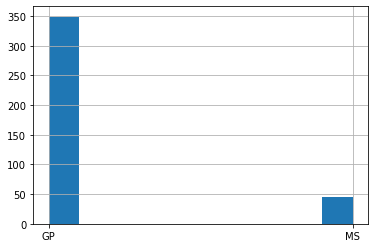

In [6]:
stud.school.hist()
stud.school.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

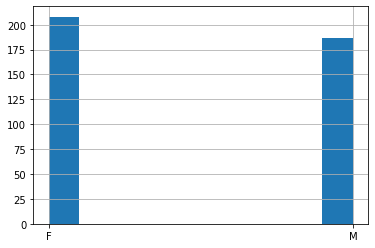

In [7]:
stud.sex.hist()
stud.sex.describe()

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

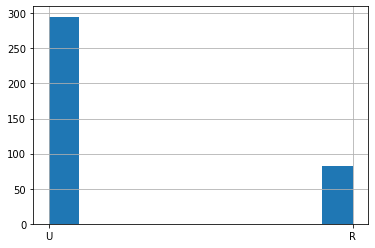

In [8]:
stud.address.hist()
stud.address.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

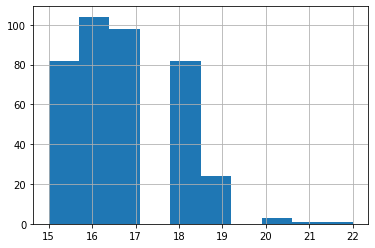

In [8]:
stud.age.hist()
stud.age.describe()

<AxesSubplot:xlabel='age', ylabel='count'>

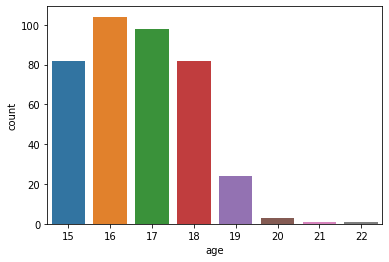

In [11]:
sns.countplot( x='age', data = stud)

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

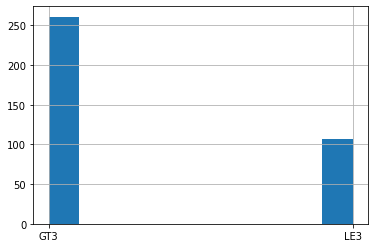

In [10]:
stud.famsize.hist()
stud.famsize.describe()     


count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

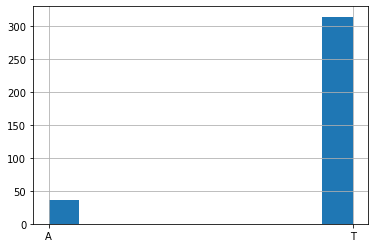

In [11]:
stud.Pstatus.hist()
stud.Pstatus.describe()

count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

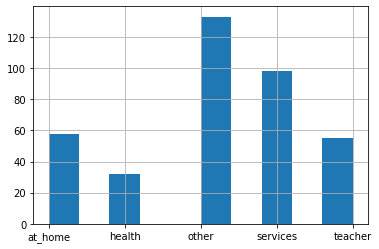

In [12]:
stud.Mjob.hist()
stud.Mjob.describe()

count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

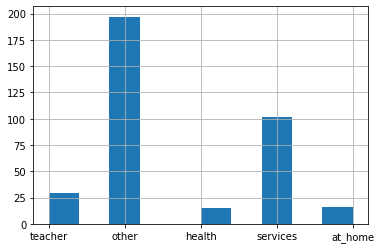

In [13]:
stud.Fjob.hist()
stud.Fjob.describe()

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

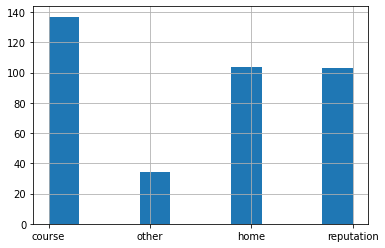

In [14]:
stud.reason.hist()
stud.reason.describe()

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

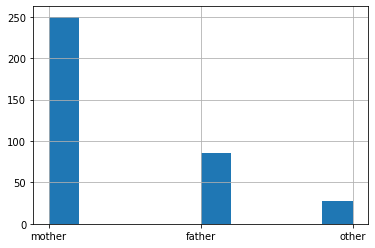

In [15]:
stud.guardian.hist()
stud.guardian.describe()  

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

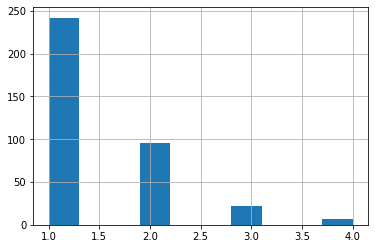

In [16]:
stud.traveltime.hist()
stud.traveltime.describe() 

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

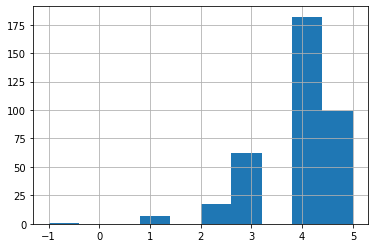

In [45]:
stud.famrel.hist()
stud.famrel.describe()

Значение -1 семейные отношения можно расценить как очень плохо или считать, что это ошибка. Для более красивого результата приведём в общий вид и заменим -1 на 1.

In [113]:
stud.loc[stud['famrel'] == -1, 'famrel'] = 1

<AxesSubplot:xlabel='Fedu', ylabel='count'>

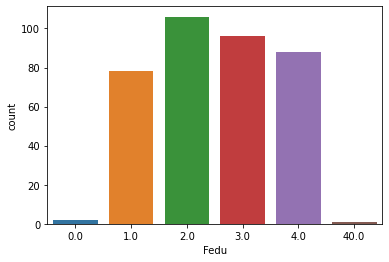

In [47]:
sns.countplot( x='Fedu', data = stud)

<AxesSubplot:xlabel='Medu', ylabel='count'>

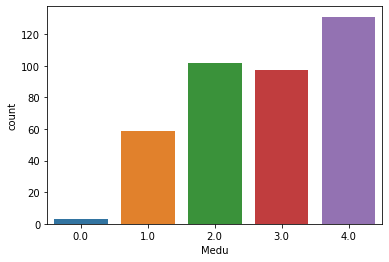

In [15]:
sns.countplot( x='Medu', data = stud)

In [114]:
stud.loc[stud['Fedu'] == 40, 'Fedu'] = 4 #заменяю значение 40 в столбце Fedu на 4

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

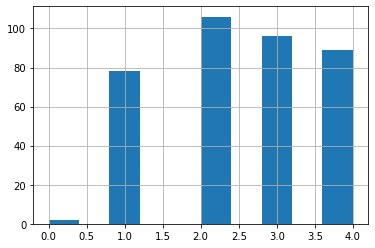

In [49]:
stud.Fedu.hist()
stud.Fedu.describe()

<AxesSubplot:xlabel='studytime', ylabel='count'>

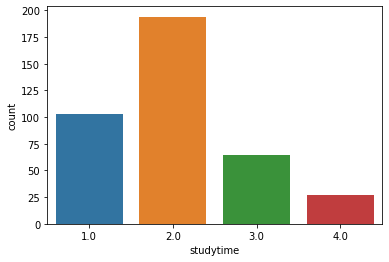

In [50]:
sns.countplot( x='studytime', data = stud)

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

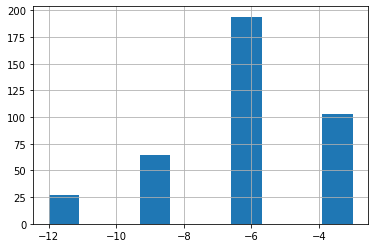

In [51]:
stud.granular.hist()
stud.granular.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

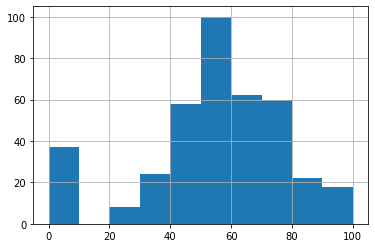

In [52]:
stud.score.hist()
stud.score.describe()

count    383.000000
mean       5.741514
std        8.068329
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

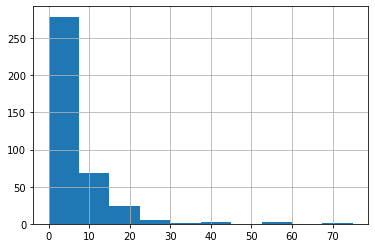

In [53]:
stud.absences.hist()
stud.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


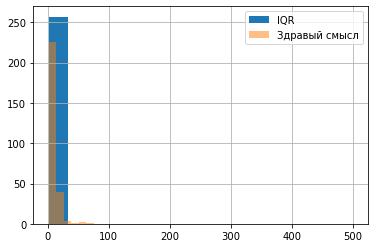

In [54]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR,perc75 + 1.5*IQR)].hist(bins = 16, range = (1, 500), label = 'IQR')

stud.absences.loc[stud.absences <= 200].hist(alpha = 0.5, bins = 16, range = (1, 200), label = 'Здравый смысл')
 
plt.legend();

Мы видим границы выбросов от -12 до 20, что не совсем корректно, так как в данные границы попадает очень много реальных значений. Но также видим значения больше 200, это предполагает,что посещение школы не было вовсе.

In [116]:
stud.loc[stud['absences'] > 200, 'absences'] = 4 #заменяю значения больше 200 в столбце absences на 4 (медианное значение)

В целом пропусков и выбросов не так много, заменили значения по смыслу и медиане.

# Корреляционный анализ

In [100]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.067415,0.029023,0.135107,-0.065946,0.164050,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014459,0.025335,0.064164,-0.045051,0.097955,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.026122,-0.025892,0.042663,0.023862,0.040489,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021542,-0.021937,0.037636,-0.021531,-0.013188,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.039555,-0.121969,-0.051280,-0.080016,-0.067668,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009110,0.098382,0.120914,0.081284,0.068098,-0.344338
granular,0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.039555,0.121969,0.051280,0.080016,0.067668,-0.115741
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,-0.039555,1.000000,0.172751,0.077167,0.086309,-0.050349,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.172751,1.000000,0.296437,0.061575,-0.070939,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.077167,0.296437,1.000000,-0.015608,0.037243,-0.129685


Видим, что studytime скоррелирована отрицательно с granular. Удалим её.

In [117]:
stud.drop(['granular'], inplace = True, axis = 1) # убираем столбец granular

(array([ 37.,   0.,   8.,  24.,  58., 100.,  62.,  60.,  22.,  18.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

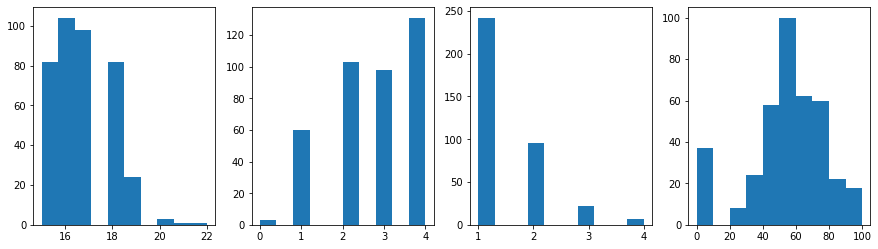

In [86]:
fig, axes = plt.subplots(1, 4, figsize =(15,4))
axes[0].hist(stud['age'])

axes[1].hist(stud['Medu'])

axes[2].hist(stud['traveltime'])

axes[3].hist(stud['score'])

<AxesSubplot:>

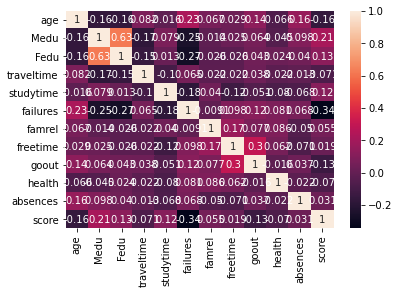

In [102]:
sns.heatmap(stud.corr(), annot = True)

Видим, что studytime скоррелирована отрицательно с granular. Так же Medu и Fedu скоррелированы, можно заменить пропуски значениями.

In [118]:
stud.Medu = stud[['Medu','Fedu']].apply(lambda x: x[1] if pd.isna(x[0]) else x[0],axis=1) #заменяем пустые значения в столбце Medu, на значения из столбца Fedu

# Анализ номинативных переменных

In [104]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

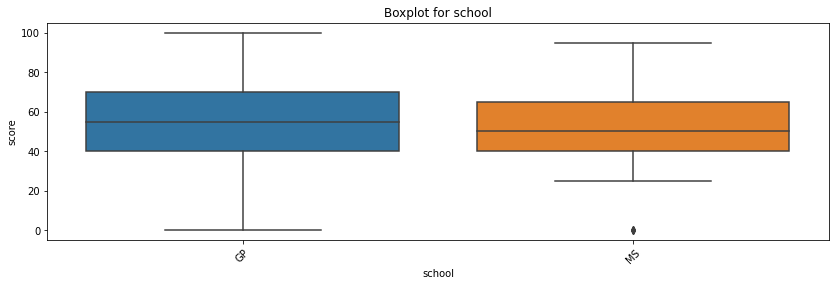

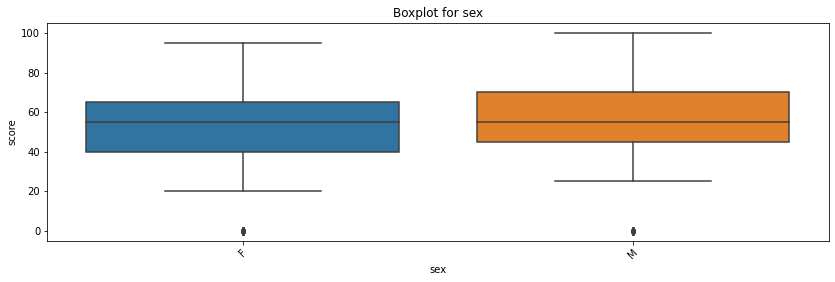

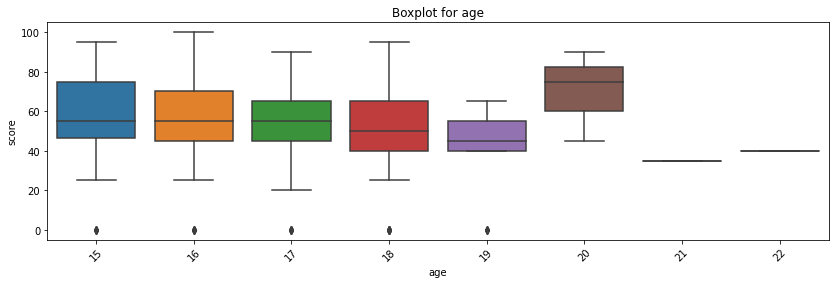

C:\Users\Anton\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Anton\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Anton\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Anton\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Anton\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Anton\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeW

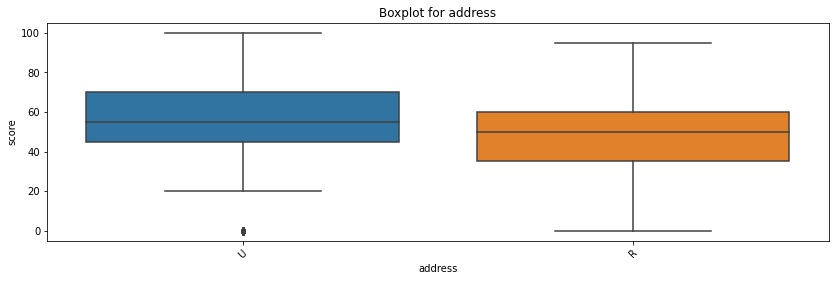

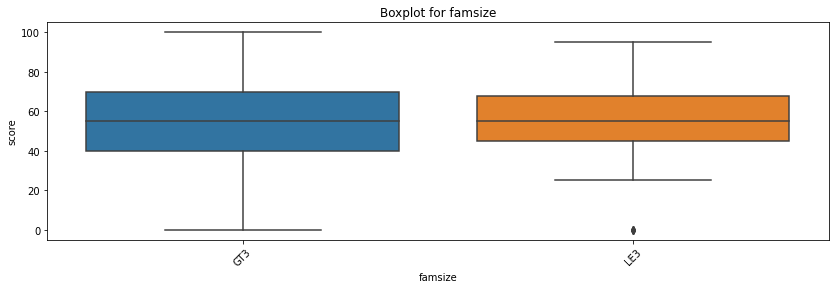

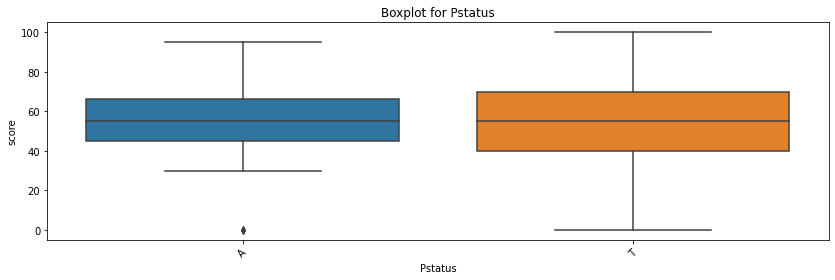

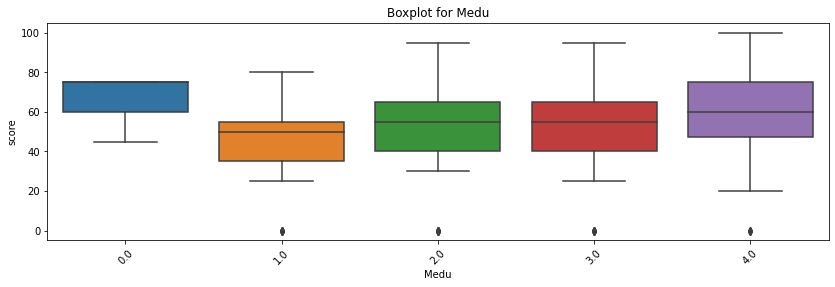

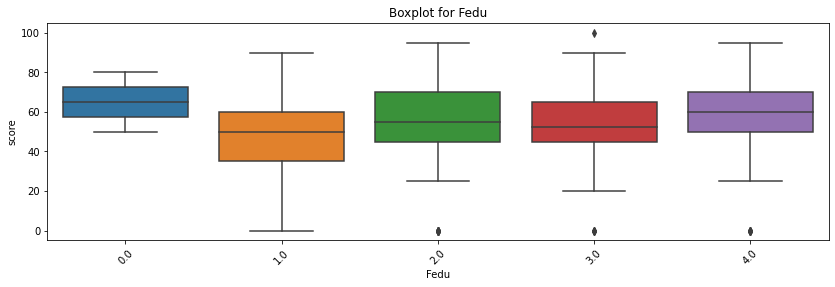

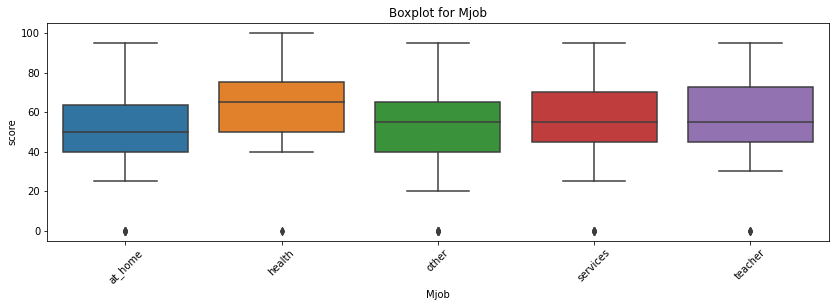

Найдены статистически значимые различия для колонки Mjob


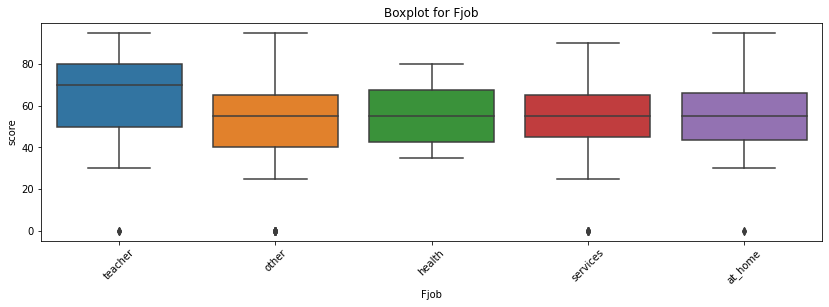

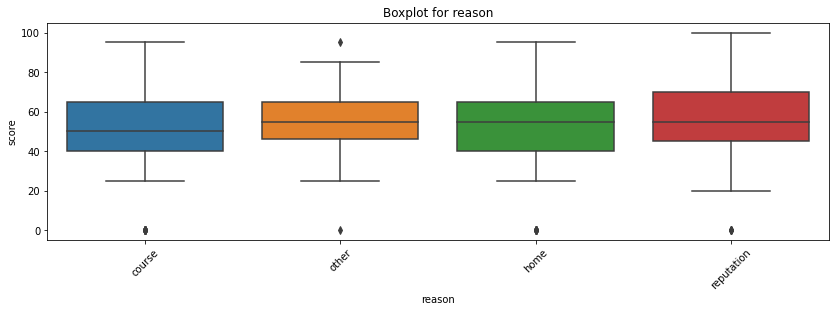

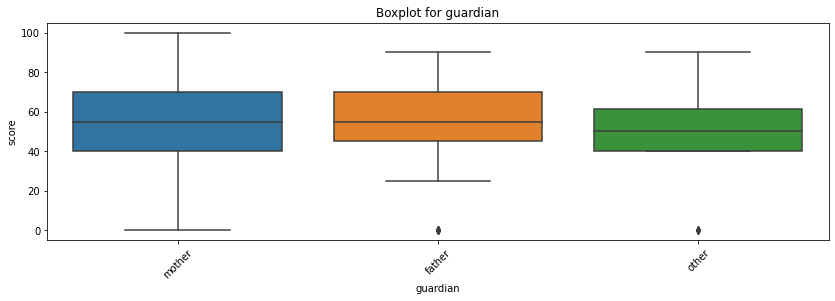

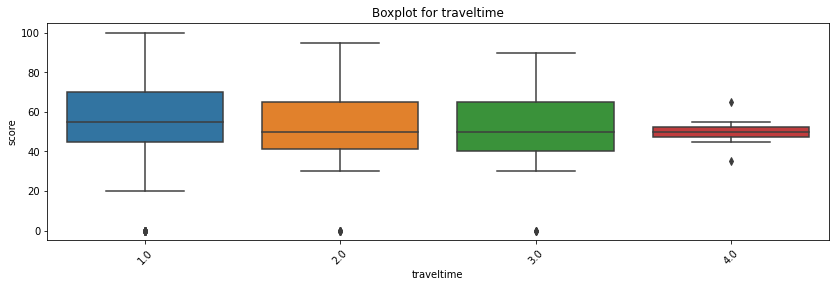

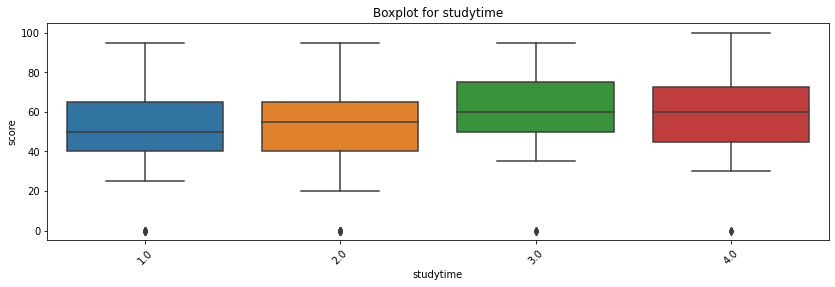

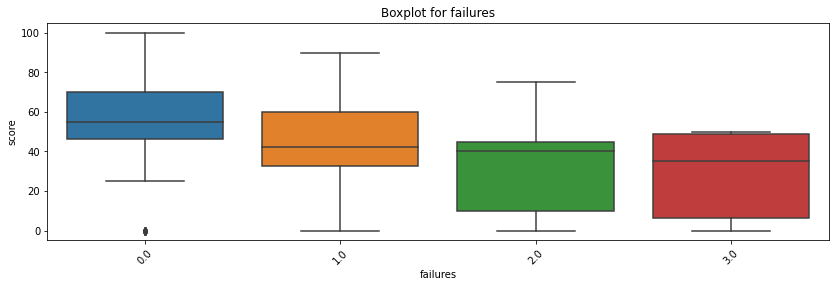

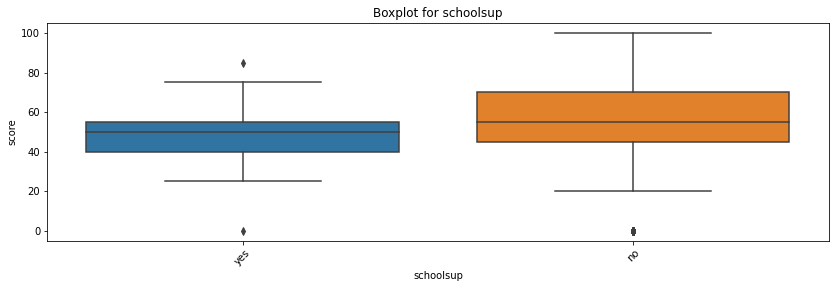

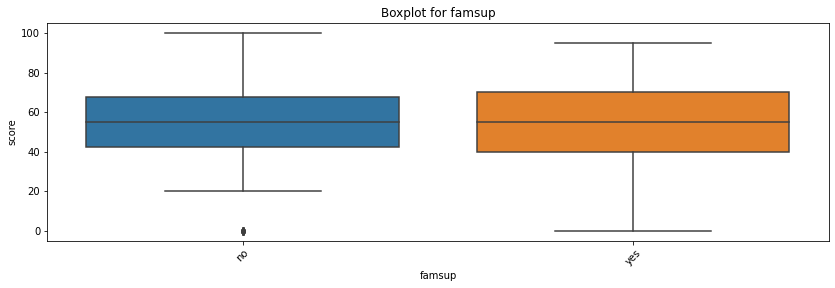

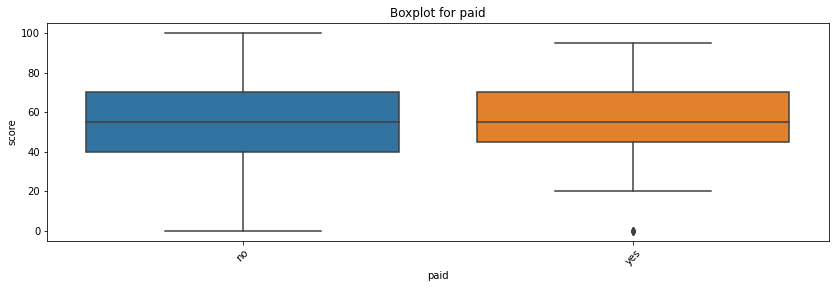

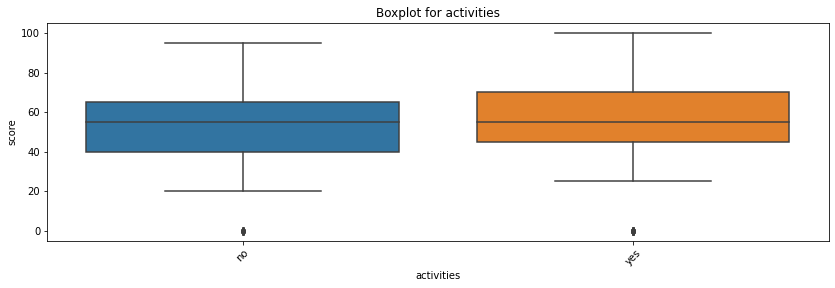

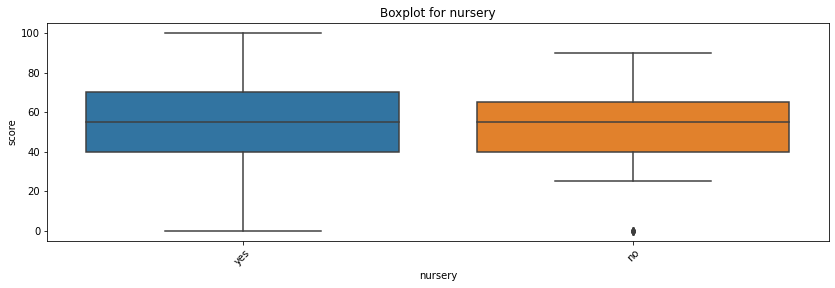

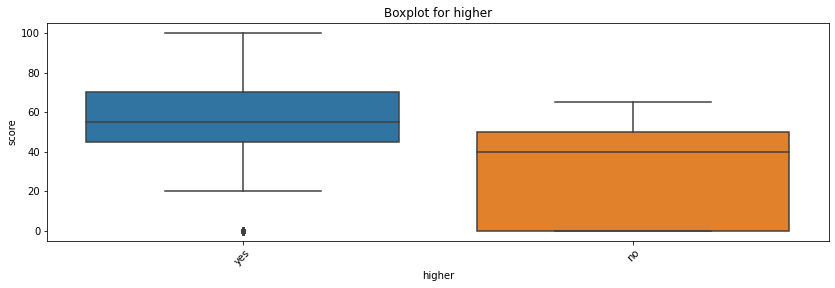

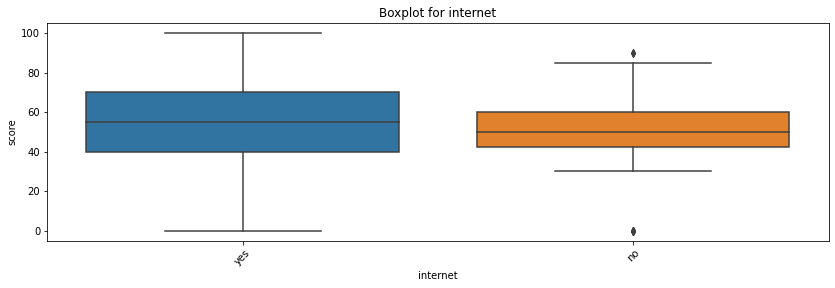

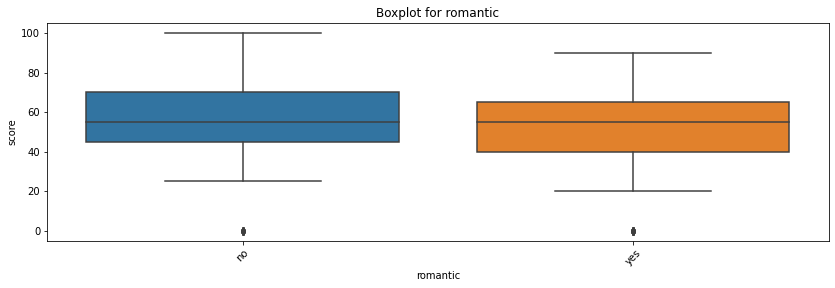

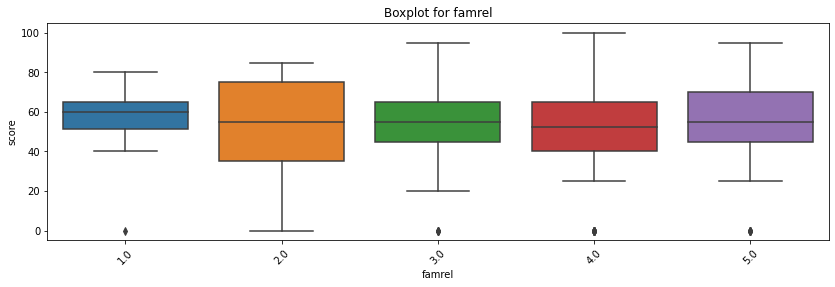

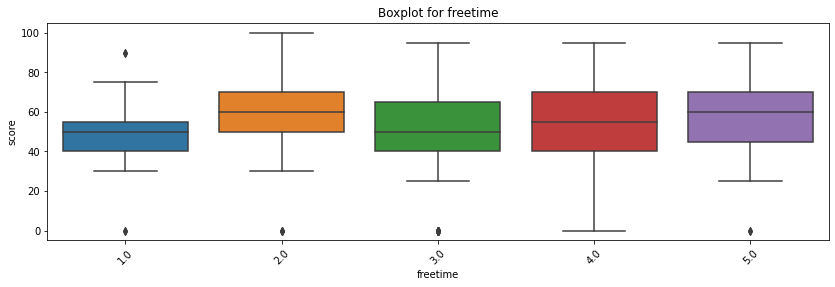

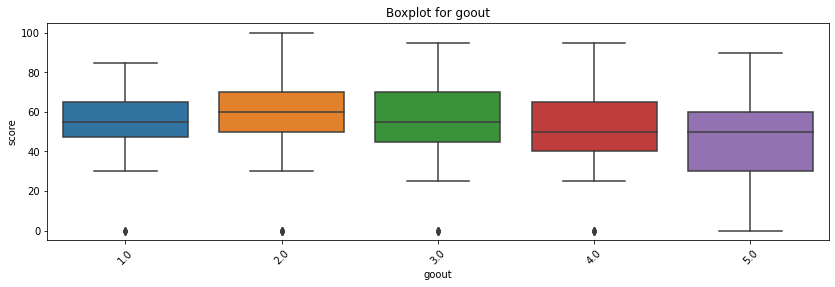

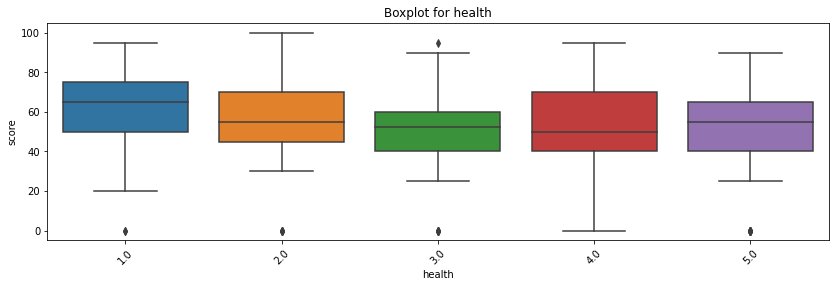

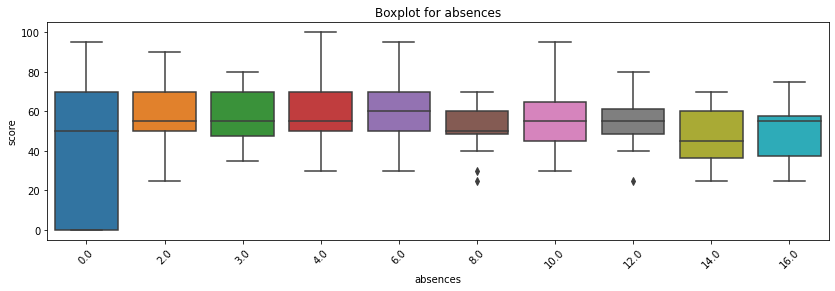

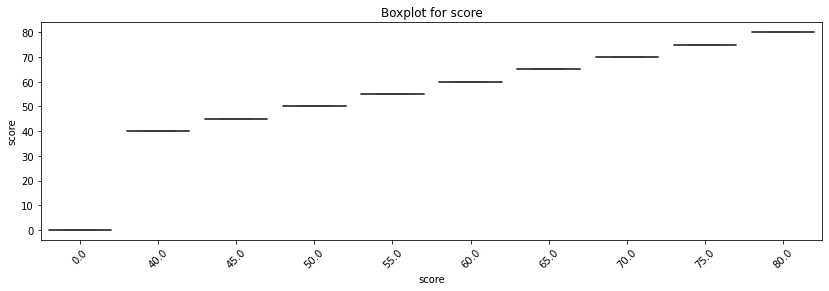

Найдены статистически значимые различия для колонки score


In [105]:
for column in stud.columns:
    get_boxplot(column)

Устраним те данные, которые не влияют на предсказываемую величину (в нашем случае — на переменную score). Нашлись статистически значимые различия для колонки Mjob.

In [119]:
stud.drop(['school', 'Fedu', 'famsize', 'Pstatus', 'reason', 'guardian', 'famsup', 'paid', 'nursery', 'activities'], inplace = True, axis = 1) # удаляем данные не значимые для построения модели

In [120]:
stud.head()

,sex,age,address,Medu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,F,18,U,4.0,at_home,teacher,2.0,2.0,0.0,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,1.0,at_home,other,1.0,2.0,0.0,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,1.0,at_home,other,1.0,2.0,3.0,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,4.0,health,NaN,1.0,3.0,0.0,no,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,3.0,other,other,1.0,2.0,0.0,no,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Выводы:
+ Имеются полностью заполненными значениями только 3 признака, школа, пол и возраст. В остальных столбцах имеются пустые значения, но их не так много. 
+ Выбросы найдены только в столбцах образование отца и семейные отношения, что позволяет сделать вывод о том, что данные достаточно чистые. В семейных отношениях выброс можно расценивать как очень плохие отношения, так и как ошибка при выставлении оценки.
+ Положительная корреляция параметра Medu и Fedu может говорить о том, что образование матери и отца схожи, поэтому пропуски можно дозаполнить.
+ Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Mjob, Medu, absences,failures,higher, age и studytime.